# Esercitazione di riepilogo su MongoDB

In questi esercizi vedremo:

* MongoDB Compass
* CRUD Operations in MongoDB
* Python: PyMongo e Pandas

## Esercizio 1

**Obiettivo: Utilizzare MongoDB Compass per accedere ed esplorare i dati**

* Visualizzare la Collection: connettersi al database ITS_NoSQL, collection TWITCH, esplorare la struttura dei documenti.
* Query di base: 
  * trovare lo streamer con il maggior numero di follower
  * Trovare gli streamer che parlano inglese e hanno più di un milione di follower
* Filtri e proiezioni:
  * Filtrare tutti gli streamer con almeno 200 ore di live
  * Mostrare solo i campi NAME, TOTAL_FOLLOWERS e MOST_STREAMED_GAME

## Esercizio 2

**Obiettivo: Utilizzare PyMongo per eseguire operazioni CRUD di base.**
1. Connessione al database con un notebook Python
2. CRUD: Create Read Update Delete  
  2.1 Create: Inserire il nuovo documento nella collection (v. classroom)  
  2.2 Read: trovare lo streamer con il maggior numero di follower  
  2.3 Update: aggiornare il documento inserito al punto uno cambiando il gioco più streammato in Hogwarts Legacy  
  2.4 Delete: eliminare il documento inserito al punto a e aggiornato al punto c  

Connessione al database: iniziare il Notebook Python per connettersi al database ITS_NoSQL e alla collection TWITCH

In [1]:
# Importo il costruttore dell'oggetto MongoClient dal modulo pymongo
from pymongo import MongoClient

# Creo la connessione creando l'oggetto MongoClient, passandogli la connstring
client = MongoClient("mongodb+srv://<usr>:<pw>@<host>")

# specifico quale database e quale collection voglio utilizzare
db = client['ITS_NoSQL']
collection = db['TWITCH']

**Create**: Inserire il nuovo documento nella collection

In [3]:
new_streamer = {
    "RANK": 101,
    "NAME": "<vostro nome>",
    "LANGUAGE": "Italian",
    "TYPE": "gamer",
    "MOST_STREAMED_GAME": "Minecraft",
    "2ND_MOST_STREAMED_GAME": "Fortnite",
    "AVERAGE_STREAM_DURATION": 5.2,
    "FOLLOWERS_GAINED_PER_STREAM": 1000,
    "AVG_VIEWERS_PER_STREAM": 1500,
    "AVG_GAMES_PER_STREAM": 1.5,
    "TOTAL_TIME_STREAMED": 300,
    "TOTAL_FOLLOWERS": 50000,
    "TOTAL_VIEWS": 70000,
    "TOTAL_GAMES_STREAMED": 50,
    "ACTIVE_DAYS_PER_WEEK": 4,
    "MOST_ACTIVE_DAY": "Saturday",
    "DAY_WITH_MOST_FOLLOWERS_GAINED": "Sunday"
}

# Chiamo insert_one() passandogli il documento da inserire
collection.insert_one(new_streamer)

InsertOneResult(ObjectId('669e6415163a8f42383e107e'), acknowledged=True)

**READ**: Trovare lo streamer con il maggior numero di follower:

In [2]:
# Chiamo find_one() passandogli il sort come argomento, sul campo TOTAL_FOLLOWERS, ordinamento descending quindi -1
top_streamer = collection.find_one(sort=[("TOTAL_FOLLOWERS", -1)])
print(top_streamer)

{'_id': ObjectId('669e2d7eb913c1353dff59de'), 'RANK': 271, 'NAME': 'ninja', 'LANGUAGE': 'English', 'TYPE': 'personality', 'MOST_STREAMED_GAME': 'Fortnite', '2ND_MOST_STREAMED_GAME': 'PUBG: BATTLEGROUNDS', 'AVERAGE_STREAM_DURATION': 7.4, 'FOLLOWERS_GAINED_PER_STREAM': 9552, 'AVG_VIEWERS_PER_STREAM': 28075, 'AVG_GAMES_PER_STREAM': 1.3, 'TOTAL_TIME_STREAMED': 1247, 'TOTAL_FOLLOWERS': 19000000, 'TOTAL_VIEWS': 572000000, 'TOTAL_GAMES_STREAMED': 70, 'ACTIVE_DAYS_PER_WEEK': 4.1, 'MOST_ACTIVE_DAY': 'Thursday', 'DAY_WITH_MOST_FOLLOWERS_GAINED': 'Sunday'}


**UPDATE**: aggiornare il documento inserito al punto uno cambiando il gioco più streammato in Hogwarts Legacy

In [5]:
# chiamo update_one passandogli la query per individuare i documenti da aggiornare, e l'aggiornamento
collection.update_one({"NAME": "new_streamer"}, {"$set": {"MOST_STREAMED_GAME": "Hogwarts Legacy"}})

UpdateResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000d1'), 'opTime': {'ts': Timestamp(1721656552, 22), 't': 209}, 'nModified': 0, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1721656552, 22), 'signature': {'hash': b'\xa2\xf1\xa3\xada\xf6I|\xae\xe9\x9a\xd4\x04yVU\xd2\xe7W-', 'keyId': 7340746313190866961}}, 'operationTime': Timestamp(1721656552, 22), 'updatedExisting': True}, acknowledged=True)

**DELETE**: eliminare il documento inserito al punto a e aggiornato al punto c


In [6]:
# chiamo delete_one passandogli la query che identifica il documento
collection.delete_one({"NAME": "new_streamer"})

DeleteResult({'n': 1, 'electionId': ObjectId('7fffffff00000000000000d1'), 'opTime': {'ts': Timestamp(1721656804, 25), 't': 209}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1721656804, 25), 'signature': {'hash': b'u\\>w\x9c\xf9I\t\x0b\x08\x15\xb4i\xb2\x02\xf2O2\xfd\x8c', 'keyId': 7340746313190866961}}, 'operationTime': Timestamp(1721656804, 25)}, acknowledged=True)

## Esercizio 3: Analisi dati con Pandas

**Obiettivo: Utilizzare Pandas per analizzare i dati di Twitch.**
1. Caricamento dei Dati in un DataFrame: utilizzando il Notebook creato nell’esercizio precedente, creare un dataframe Pandas con i dati della collection.
2. Analisi di base:  
  2.1 Calcolare la media di TOTAL_FOLLOWERS.  
  2.2 Trovare lo streamer con la media di spettatori per stream più alta.  
  2.3 Visualizzazione dei dati: Utilizzando matplotlib, creare un grafico a barre che mostra i top 10 streamer per numero di follower.  
  2.4 Esportare i dati in CSV.  


Caricamento dei dati in un DataFrame:


In [8]:
import pandas as pd

data = list(collection.find())
df = pd.DataFrame(data)
df.head()

,_id,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,669e2d7eb913c1353dff58d1,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,669e2d7eb913c1353dff58d2,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday
2,669e2d7eb913c1353dff58d3,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689,12331,1.3,6728,797000,14200000,111,2.8,Thursday,Sunday
3,669e2d7eb913c1353dff58d4,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185,0,3.6,2554,4220000,53,385,6.2,Friday,Monday
4,669e2d7eb913c1353dff58d5,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3,Wednesday,Saturday


Analisi di base: media di `TOTAL_FOLLOWERS`

In [9]:
# Calcolo la media chiamando la funzione mean() del dataframe sulla colonna
average_followers = df['TOTAL_FOLLOWERS'].mean()

print(f"Media di followers: {average_followers}")

Media di followers: 919403.3423423424


Analisi di base: streamer con la media più alta di spettatori per stream

In [12]:
# 
top_viewer_streamer = df.loc[df['AVG_VIEWERS_PER_STREAM'].idxmax()]
print(f"Streamer con più spettatori per stream: {top_viewer_streamer['NAME']} con una media di {top_viewer_streamer['AVG_VIEWERS_PER_STREAM']} spettatori")

Streamer con più spettatori per stream: twitchrivals con una media di 481615 spettatori


Visualizzazione dei dati: Utilizzando `matplotlib`, creare un grafico a barre che mostra i top 10 streamer per numero di follower.

In [ ]:
# se non è installato:
!python -m pip install matplotlib

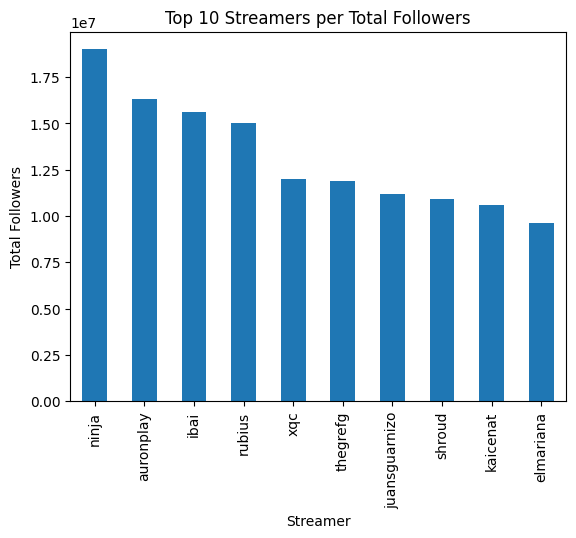

In [15]:
# Importo pyplot da matplotlib
import matplotlib.pyplot as plt

top_10_streamers = df.nlargest(10, 'TOTAL_FOLLOWERS')
top_10_streamers.plot(kind='bar', x='NAME', y='TOTAL_FOLLOWERS', legend=False)
plt.xlabel('Streamer')
plt.ylabel('Total Followers')
plt.title('Top 10 Streamers per Total Followers')
plt.show()

## Esercizio 4

**Obiettivo: Utilizzare l'aggregation framework di MongoDB per estrarre informazioni complesse.**
1. Conteggio dei Streamer per Lingua: utilizzare l’aggregation framework per contare il numero di streamer per ogni lingua.
2. Calcolo della Durata Media di Streaming per Tipo di Streamer: calcolare la durata media di streaming per ogni tipo di streamer.
3. Trovare i Giorni più Attivi per i Top 5 Streamer: Utilizzare l'aggregation framework per trovare i giorni più attivi per i top 5 streamer per numero di follower.
4. Streamers con la Maggior Parte dei Followers guadagnati nel Giorno più Attivo: Trovare gli streamer che guadagnano la maggior parte dei loro follower nel giorno più attivo.


Conteggio dei Streamer per Lingua: utilizzare l’aggregation framework per contare il numero di streamer per ogni lingua.

In [21]:
pipeline = [
    {"$group": {"_id": "$LANGUAGE", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
o1 = list(collection.aggregate(pipeline))
print(o1)

[{'_id': 'English', 'count': 401}, {'_id': 'Russian', 'count': 115}, {'_id': 'Spanish', 'count': 106}, {'_id': 'Portuguese', 'count': 82}, {'_id': 'Japanese', 'count': 79}, {'_id': 'French', 'count': 72}, {'_id': 'German', 'count': 60}, {'_id': 'Chinese', 'count': 28}, {'_id': 'Polish', 'count': 18}, {'_id': 'Italian', 'count': 13}, {'_id': 'Turkish', 'count': 7}, {'_id': 'Thai', 'count': 5}, {'_id': 'Czech', 'count': 3}, {'_id': 'Ukrainian', 'count': 3}, {'_id': 'Korean', 'count': 2}, {'_id': 'Cantonese', 'count': 2}, {'_id': 'Arabic', 'count': 1}, {'_id': 'Romanian', 'count': 1}, {'_id': 'Hungarian', 'count': 1}]


Calcolo della Durata Media di Streaming per Tipo di Streamer: calcolare la durata media di streaming per ogni tipo di streamer.

In [22]:
pipeline = [
    {"$group": {"_id": "$TYPE", "average_duration": {"$avg": "$AVERAGE_STREAM_DURATION"}}},
    {"$sort": {"average_duration": -1}}
]
o2 = list(collection.aggregate(pipeline))
print(o2)

[{'_id': 'esports', 'average_duration': 7.617543859649123}, {'_id': 'personality', 'average_duration': 5.898619957537155}]


Trovare i Giorni più Attivi per i Top 5 Streamer: Utilizzare l'aggregation framework per trovare i giorni più attivi per i top 5 streamer per numero di follower.

In [23]:
pipeline = [
    {"$sort": {"TOTAL_FOLLOWERS": -1}},
    {"$limit": 5},
    {"$project": {"NAME": 1, "MOST_ACTIVE_DAY": 1}}
]
o3 = list(collection.aggregate(pipeline))
print(o3)


[{'_id': ObjectId('669e2d7eb913c1353dff59de'), 'NAME': 'ninja', 'MOST_ACTIVE_DAY': 'Thursday'}, {'_id': ObjectId('669e2d7eb913c1353dff58d6'), 'NAME': 'auronplay', 'MOST_ACTIVE_DAY': 'Wednesday'}, {'_id': ObjectId('669e2d7eb913c1353dff58d5'), 'NAME': 'ibai', 'MOST_ACTIVE_DAY': 'Wednesday'}, {'_id': ObjectId('669e2d7eb913c1353dff5901'), 'NAME': 'rubius', 'MOST_ACTIVE_DAY': 'Sunday'}, {'_id': ObjectId('669e2d7eb913c1353dff58e5'), 'NAME': 'xqc', 'MOST_ACTIVE_DAY': 'Wednesday'}]


Streamers con la Maggior Parte dei Followers guadagnati nel Giorno più Attivo: Trovare gli streamer che guadagnano la maggior parte dei loro follower nel giorno più attivo.

In [24]:
pipeline = [
    {"$match": {"DAY_WITH_MOST_FOLLOWERS_GAINED": {"$exists": True}}},
    {"$group": {"_id": "$DAY_WITH_MOST_FOLLOWERS_GAINED", "total_followers_gained": {"$sum": "$FOLLOWERS_GAINED_PER_STREAM"}}},
    {"$sort": {"total_followers_gained": -1}}
]
o4 = list(collection.aggregate(pipeline))
print(o4)


[{'_id': 'Sunday', 'total_followers_gained': 1261687}, {'_id': 'Saturday', 'total_followers_gained': 558644}, {'_id': 'Monday', 'total_followers_gained': 423024}, {'_id': 'Tuesday', 'total_followers_gained': 410980}, {'_id': 'Wednesday', 'total_followers_gained': 263888}, {'_id': 'Friday', 'total_followers_gained': 243439}, {'_id': 'Thursday', 'total_followers_gained': 218400}]


# Un po' di grafica con Matplotlib!

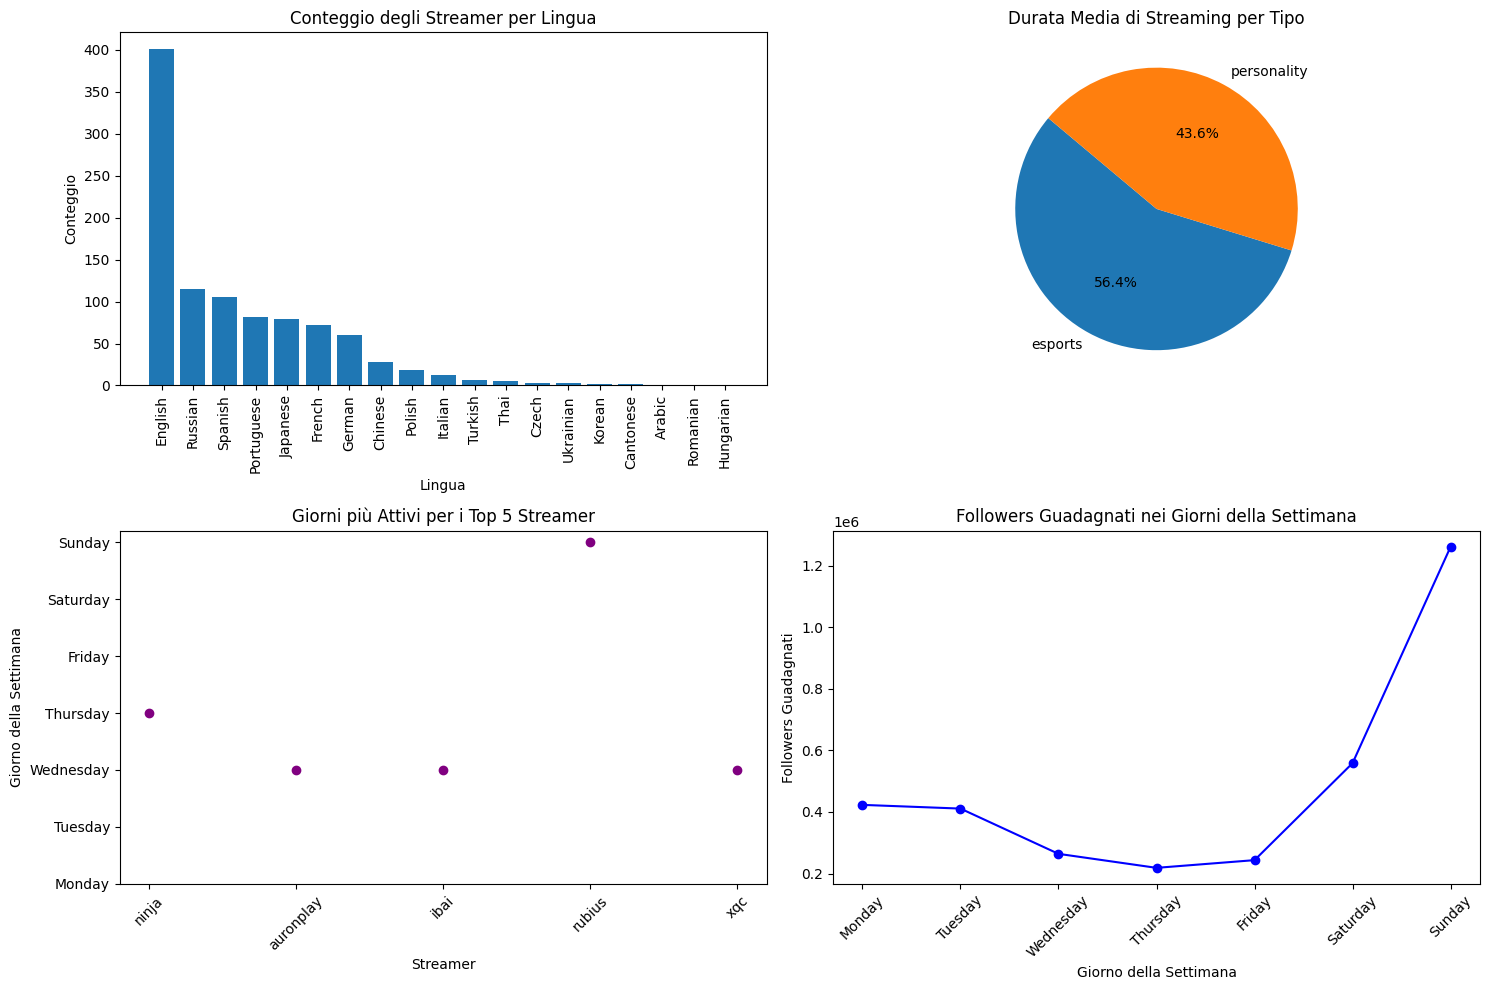

In [32]:
# Creazione della figura e dei quattro sottografici
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Primo grafico: Conteggio degli streamer per lingua
languages = [item['_id'] for item in o1]
counts = [item['count'] for item in o1]
axs[0, 0].bar(languages, counts)
axs[0, 0].set_title('Conteggio degli Streamer per Lingua')
axs[0, 0].set_xlabel('Lingua')
axs[0, 0].set_ylabel('Conteggio')
axs[0, 0].tick_params(axis='x', rotation=90)

# Secondo grafico: Durata media di streaming per tipo di streamer (pie chart)
types = [item['_id'] for item in o2]
avg_durations = [item['average_duration'] for item in o2]
axs[0, 1].pie(avg_durations, labels=types, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Durata Media di Streaming per Tipo')

# Terzo grafico: Giorni più attivi per i top 5 streamer
names = [item['NAME'] for item in o3]
active_days = [item['MOST_ACTIVE_DAY'] for item in o3]
# Mappa dei giorni della settimana a numeri
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
day_numbers = [day_mapping[day] for day in active_days]

axs[1, 0].scatter(names, day_numbers, color='purple')
axs[1, 0].set_title('Giorni più Attivi per i Top 5 Streamer')
axs[1, 0].set_xlabel('Streamer')
axs[1, 0].set_ylabel('Giorno della Settimana')
axs[1, 0].set_yticks(list(day_mapping.values()))
axs[1, 0].set_yticklabels(day_mapping.keys())
axs[1, 0].tick_params(axis='x', rotation=45)

# Quarto grafico: Followers guadagnati nel giorno più attivo
# Convertiamo i dati in un DataFrame pandas
df_o4 = pd.DataFrame(o4)

# Creiamo una mappa dei giorni della settimana a numeri per ordinare
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_o4['day_order'] = pd.Categorical(df_o4['_id'], categories=day_order, ordered=True)
df_o4 = df_o4.sort_values('day_order')

axs[1, 1].plot(df_o4['_id'], df_o4['total_followers_gained'], marker='o', linestyle='-', color='b')
axs[1, 1].set_title('Followers Guadagnati nei Giorni della Settimana')
axs[1, 1].set_xlabel('Giorno della Settimana')
axs[1, 1].set_ylabel('Followers Guadagnati')
axs[1, 1].tick_params(axis='x', rotation=45)

# Miglioramento del layout
plt.tight_layout()
plt.show()